# Introduction

I found this dataset on the UC Irvine Machine Learning Repository. The data is split into two categories: red wine and white wine. Each set per category consists of several chemical properties of a given wine along with a quality score from 1 to 10. In this notebook I want to play around with some statistical quantities and use some machine learning algorithms to predict scores or groups of scores.

We will adopt OSEMN pipeline strategy:

1. Obtain the data
2. Scrubbing or cleaning the data. This includes data imputation (filling in missing values) and adjusting column names.
3. Explore the data. Look for outliers or weird data. Explore the relationship between features and output varaibles. Construct a correlation matrix.
4. Model the data (ML, etc).
5. iNterpret the data. What conclusions can we make? What are the most important factors (features)? How are the varaibles related to each other?  




In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

from sklearn.neural_network import MLPClassifier

%matplotlib inline

# Obtain The Data
This is easy. The data is in a CSV, so we can read it in with pandas.



In [3]:
red_df = pd.read_csv("winequality-red.csv",sep=';')
white_df = pd.read_csv("winequality-white.csv",sep=';')

# Scrub The Data
The data as given is already quite pristine. We could rename the columns, but the names as they are now are perfectly fine. Maybe once we get into the ML part.

# Explore the Data
First, let's look at the metadata.

In [3]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


No missing data points, that's good. We see that there are about three times as many white data points as there are red.

In [5]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In both cases the lowest score is a 3. The highest score for the red wines is an 8, while that for the white wines is a 9. No 1's, 2's, or 10's in either case. The means are roughly equal. The standard deviation in both cases is less than 1, so the data is very concentrated in the 5-7 score region. Let's create a histogram to check.

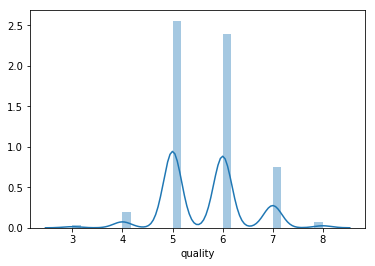

In [7]:
sns.distplot(red_df['quality'])

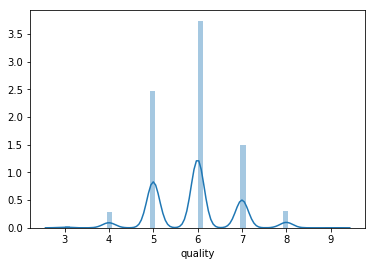

In [8]:
sns.distplot(white_df['quality'])

Let's construct a correlation matrix for each color.

In [9]:
white_corr = white_df.corr()
red_corr = red_df.corr()

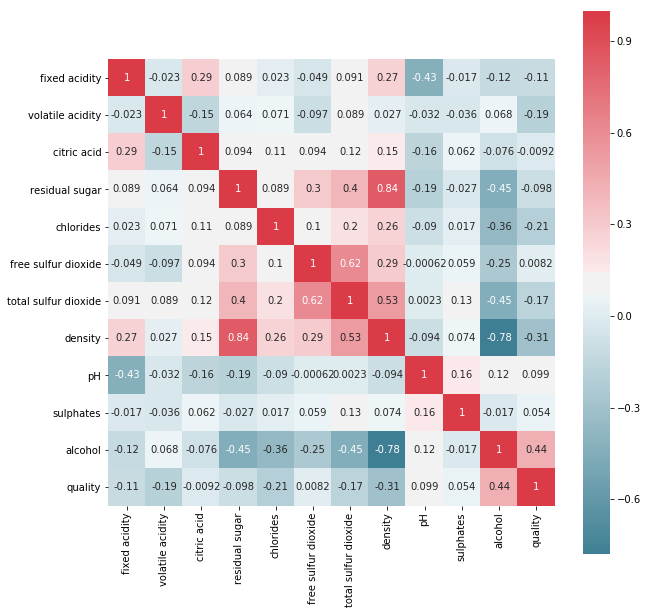

In [10]:
#white heat map
plt.subplots(figsize=(10,10))
sns.heatmap(white_corr, mask=np.zeros_like(white_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True)

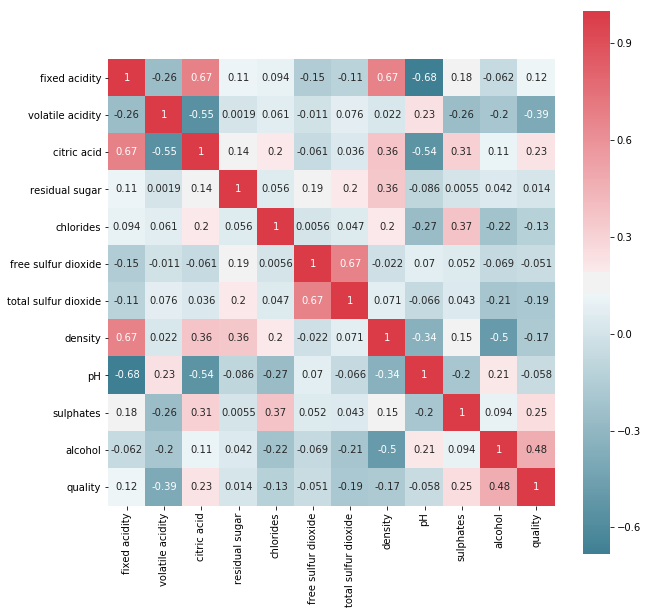

In [11]:
#red heat map
plt.subplots(figsize=(10,10))
sns.heatmap(red_corr, mask=np.zeros_like(red_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True)

(Un)surprisingly quality is most strongly correlated with alcohol content. I'm curious about the differences between these tables, as opposed to the particular values in each table. For example, residual sugar and density are strongly correlated in white wines, but not so strongly correlated in red wines. Obviously red and white wines are different, but I'd like to understand exactly what that entails chemically.

# Fun Statistics Stuff
Based on what we've seen, it seems that the mean quality score is different between red wines and white wines. Is this difference real? Let's use a bootstrap approach to formalize this more carefully. Let $\bar{X}_{red}$ and $\bar{X}_{white}$ denote the data means of the empirical distributions of the red and white wines, respectively. Let $\mu_{red}$ and $\mu_{white}$ denote the actual means of the true distribution (which we don't know), and let $\bar{X^{*}}_{red}$ and $\bar{X^{*}}_{white}$ denote empirical bootstrap sample means. We'll use lower case x's to denote the corresponding random variables. To further ease the notation a bit define $\bar{ \Delta X } = \bar{X}_{red} - \bar{X}_{white} $ and $\bar{ \Delta X^{*} } = \bar{X^{*} }_{red} - \bar{X^{*} }_{white} $.

Let's construct a confidenc interval. The bootstrap principle asserts that if we construct several values of $\delta^{*} = \bar{\Delta x^{*}} - \bar{\Delta X} $, order them, take the .025 and .975 critical values (call them $\delta^{*}_{0.025}$ and $\delta^{*}_{0.975}$ ), and construct the interval $(\bar{\Delta X} - \delta^{*}_{0.025},\bar{\Delta X} - \delta^{*}_{0.975} )$, then we have a good 95% confidence interval for $\mu_{red} - \mu_{white}$.

In [217]:
red_means= []
white_means = []

n_red = len(red_df['quality'])
n_white = len(white_df['quality'])

mu_red = np.mean(red_df['quality'])
mu_white = np.mean(white_df['quality'])

for j in range(10000):
    new_red_sample = np.random.choice(red_df['quality'], n_red, replace=True)
    new_white_sample = np.random.choice(white_df['quality'], n_white, replace=True)
    
    new_red_mean = np.mean(new_red_sample)
    new_white_mean = np.mean(new_white_sample)
    
    
    red_means.append(new_red_mean)
    white_means.append(new_white_mean)
    
deltas = sorted(np.array(red_means) - np.array(white_means) - (np.mean(red_df['quality']) - np.mean(white_df['quality'])   ))
ci_min = np.mean(red_df['quality']) - np.mean(white_df['quality']) - np.percentile(deltas, 5/2)
ci_max = np.mean(red_df['quality']) - np.mean(white_df['quality']) - np.percentile(deltas, 100 - 5/2)
print((ci_min, ci_max))
    



(-0.19548232664300505, -0.28866034393688778)


So, our 95% confidence interval is $(-0.195, -0.289)$ for $\mu_{red} - \mu_{white}$, which is strong evidence that the two means are different. Note that the mean difference from our data is about $-0.24$, comfortably in our confidence interval. Evidently white wine is reviewed more favorably than red.

# Model the Data
The assignment of an integer score from 1 to 10 is a classification problem. The simplest model is probably logistic regression. It might be better to instead, say, classifying in what range the score lays (perhaps $< 4$, $>=4$ while $<7$, and $>= 7$).

In [12]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
white_ml_df = white_df.rename(columns={"fixed acidity":"x1", "volatile acidity":"x2", "citric acid":"x3",
                                      "residual sugar":"x4", "chlorides":"x5", "free sulfur dioxide":"x6",
                                      "total sulfur dioxide":"x7", "density":"x8", "pH":"x9", "sulphates":"x10",
                                      "alcohol":"x11","quality":"y"})
red_ml_df = red_df.rename(columns={"fixed acidity":"x1", "volatile acidity":"x2", "citric acid":"x3",
                                      "residual sugar":"x4", "chlorides":"x5", "free sulfur dioxide":"x6",
                                      "total sulfur dioxide":"x7", "density":"x8", "pH":"x9", "sulphates":"x10",
                                      "alcohol":"x11","quality":"y"})

In [14]:
y_white = white_ml_df.iloc[:,11]
X_white = white_ml_df.iloc[:,:11]

y_red = red_ml_df.iloc[:,11]
X_red = red_ml_df.iloc[:,:11]

In [15]:
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, train_size=0.7, random_state=20)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, train_size=0.7, random_state=20)

In [16]:
regr = LogisticRegression(fit_intercept = True, C = 1e9)

logmodel_red = regr.fit(X_red_train, y_red_train)
y_red_predlog = logmodel_red.predict(X_red_test)
acclog_red = accuracy_score(y_red_predlog, y_red_test)
print("The score for the red wine is: " ,acclog_red)

logmodel_white = regr.fit(X_white_train, y_white_train)
y_white_predlog = logmodel_white.predict(X_white_test)
acclog_white = accuracy_score(y_white_predlog, y_white_test)
print("The score for the white wine is: " ,acclog_white)

The score for the red wine is:  0.602083333333
The score for the white wine is:  0.526530612245


If we were just randomlyguessing the score would be a good bit lower, but this still isn't great. I should instead try SVM and maybe a neural network?

In [17]:
svm = SVC()

svm_model_red = svm.fit(X_red_train, y_red_train)
y_red_svm_pred = svm_model_red.predict(X_red_test)
acclog_red = accuracy_score(y_red_svm_pred, y_red_test)
print("The score for the red wine is: " ,acclog_red)

svm_model_white = svm.fit(X_white_train, y_white_train)
y_white_svm_pred = svm_model_white.predict(X_white_test)
acclog_white = accuracy_score(y_white_svm_pred, y_white_test)
print("The score for the white wine is: " ,acclog_white)



The score for the red wine is:  0.589583333333
The score for the white wine is:  0.556462585034


SVM isn't doing any better. What about a shallow neural network? Maybe later add skipping.

In [20]:
clf = MLPClassifier(solver='lbfgs',activation='tanh', alpha=1e-5, hidden_layer_sizes=(16, 1), random_state=1)

nn_model_red = clf.fit(X_red_train, y_red_train) 
y_red_nn_pred = nn_model_red.predict(X_red_test)
acclog_red = accuracy_score(y_red_nn_pred, y_red_test)
print("The score for the red wine is: " ,acclog_red)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 1), random_state=1)

nn_model_white = clf.fit(X_white_train, y_white_train) 
y_white_nn_pred = nn_model_white.predict(X_white_test)
acclog_white = accuracy_score(y_white_nn_pred, y_white_test)
print("The score for the white wine is: " ,acclog_white)


The score for the red wine is:  0.583333333333
The score for the white wine is:  0.448979591837


The neural network doesn't seem to be working too well :(  Given the fact that the output is ordinal, I think metric beyond the percentage of properly classified examples would be better.

# Illustration of Central Limit Theorem
This is a simple illustration of how sample means follow normal distributions for large sample sizes. We can use the quality scores and their empirical bootstrap distributions as the starting distribution, and show that the difference in bootstrap sample means follow a gaussian distribution. For simplicity we use the variances in the data as instead of calculating sample variances (this sample t-statistic is still normal, however).

In [219]:
red_means= []
red_variance = np.var(red_df['quality'])

white_means = []
white_variance = np.var(white_df['quality'])

n_red = len(red_df['quality'])
n_white = len(white_df['quality'])

mu_red = np.mean(red_df['quality'])
mu_white = np.mean(white_df['quality'])

for j in range(50000):
    new_red_sample = np.random.choice(red_df['quality'], n_red, replace=True)
    new_white_sample = np.random.choice(white_df['quality'], n_white, replace=True)
    
    new_red_mean = np.mean(new_red_sample)
    new_white_mean = np.mean(new_white_sample)
    
    #new_red_variance = np.var(new_red_sample)
    #new_white_variance = np.var(new_white_sample)
    
    red_means.append(new_red_mean)
    white_means.append(new_white_mean)
    
    #red_variances.append(new_red_variance)
    #white_variances.append(new_white_variance)

In [220]:
x = sorted((np.array(red_means) - np.array(white_means)   )/( red_variance/n_red + white_variance/n_white )**0.5)
kernel = gaussian_kde(x)
y = kernel(x)

In [221]:
params = stats.norm.fit(x)
y2 = stats.norm.pdf(x, params[0], params[1])

(array([  2.40851861e-04,   0.00000000e+00,   2.40851861e-04,
          7.22555582e-04,   9.63407443e-04,   9.63407443e-04,
          1.20425930e-03,   1.20425930e-03,   2.16766675e-03,
          3.13107419e-03,   2.64937047e-03,   5.05788908e-03,
          6.26214838e-03,   8.42981513e-03,   9.15237071e-03,
          1.15608893e-02,   1.46919635e-02,   1.80638896e-02,
          2.26400749e-02,   2.38443342e-02,   3.25150012e-02,
          4.67252610e-02,   4.79295203e-02,   4.19082238e-02,
          6.33440394e-02,   7.53866324e-02,   8.16487808e-02,
          9.27279664e-02,   1.11996115e-01,   1.28614894e-01,
          1.31745968e-01,   1.65706080e-01,   1.81120599e-01,
          2.14117304e-01,   2.23992231e-01,   2.38443342e-01,
          2.71199195e-01,   2.72403455e-01,   2.83964344e-01,
          3.19369567e-01,   3.37192605e-01,   3.57905865e-01,
          3.70671014e-01,   3.85844681e-01,   3.89457459e-01,
          4.02704311e-01,   3.92106829e-01,   4.09929867e-01,
        

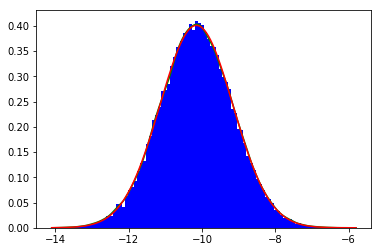

In [222]:
plt.plot(x,y, color='green')
plt.plot(x,y2, color='red')
plt.hist(x,bins=100, normed=True, color='blue')

Note that we didn't subtract off the mean from the data in constructing this distribution; hence, the distribution mean is not zero (it's ten standard deviations away fom 0!).